In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [5]:
!pip install --upgrade chromedriver-py

In [6]:
from chromedriver_py import binary_path

In [7]:
service = Service(executable_path=binary_path)

# Pull Data From YFinance

## World Indices

In [8]:
lst_world = []

driver = webdriver.Chrome(service = service)

driver.get('https://finance.yahoo.com/markets/world-indices/')

for count in range(50):
    
    try:
        XPATH = f'//*[@id="nimbus-app"]/section/section/section/article/section[1]/div/div/div/table/tbody/tr[{count}]/td[1]/div/span/a/div/span'
        element = driver.find_element(By.XPATH, XPATH)

        lst_world.append(element.text)

        
    except:
        pass

driver.close()

In [9]:
lst_world

['^GSPC',
 '^DJI',
 '^IXIC',
 '^NYA',
 '^XAX',
 '^BUK100P',
 '^RUT',
 '^VIX',
 '^FTSE',
 '^GDAXI',
 '^FCHI',
 '^STOXX50E',
 '^N100',
 '^BFX',
 'MOEX.ME',
 '^HSI',
 '^STI',
 '^AXJO',
 '^AORD',
 '^BSESN',
 '^JKSE',
 '^KLSE',
 '^NZ50',
 '^KS11',
 '^TWII',
 '^GSPTSE',
 '^BVSP',
 '^MXX',
 '^IPSA',
 '^MERV',
 '^TA125.TA',
 '^CASE30',
 '^JN0U.JO',
 'DX-Y.NYB',
 '^125904-USD-STRD',
 '^XDB',
 '^XDE',
 '000001.SS',
 '^N225',
 '^XDN',
 '^XDA']

## Futures

In [10]:
lst_fut = []

driver = webdriver.Chrome(service = service)

driver.get('https://finance.yahoo.com/markets/commodities/')

for count in range(40):
    
    try:
        
        XPATH = f'//*[@id="nimbus-app"]/section/section/section/article/section[1]/div/div/div/table/tbody/tr[{count}]/td[1]/div/span/a/div/span'
        element = driver.find_element(By.XPATH, XPATH)

        lst_fut.append(element.text)

        
    except:
        pass

driver.close()

In [11]:
lst_fut

['ES=F',
 'YM=F',
 'NQ=F',
 'RTY=F',
 'ZB=F',
 'ZN=F',
 'ZF=F',
 'ZT=F',
 'GC=F',
 'MGC=F',
 'SI=F',
 'SIL=F',
 'PL=F',
 'HG=F',
 'PA=F',
 'CL=F',
 'HO=F',
 'NG=F',
 'RB=F',
 'BZ=F',
 'B0=F',
 'ZC=F',
 'ZO=F',
 'KE=F',
 'ZR=F',
 'ZM=F',
 'ZL=F',
 'ZS=F',
 'GF=F',
 'HE=F',
 'LE=F',
 'CC=F',
 'KC=F',
 'CT=F',
 'LBS=F',
 'OJ=F',
 'SB=F']

## Currencies

In [12]:
lst_cur = []

driver = webdriver.Chrome(service = service)

driver.get('https://finance.yahoo.com/markets/currencies/')

for count in range(25):
    
    try:
        
        XPATH = f'//*[@id="nimbus-app"]/section/section/section/article/section[1]/div/div/div/table/tbody/tr[{count}]/td[1]/div/span/a/div/span'
        element = driver.find_element(By.XPATH, XPATH)

        lst_cur.append(element.text)

        
    except:
        pass

driver.close()

In [13]:
lst_cur

['EURUSD=X',
 'JPY=X',
 'GBPUSD=X',
 'AUDUSD=X',
 'NZDUSD=X',
 'EURJPY=X',
 'GBPJPY=X',
 'EURGBP=X',
 'EURCAD=X',
 'EURSEK=X',
 'EURCHF=X',
 'EURHUF=X',
 'CNY=X',
 'HKD=X',
 'SGD=X',
 'INR=X',
 'MXN=X',
 'PHP=X',
 'IDR=X',
 'THB=X',
 'MYR=X',
 'ZAR=X',
 'RUB=X']

## Pull ticker results

In [14]:
import yfinance as yf
import time

In [15]:
df_all = yf.download(lst_world + lst_fut + lst_cur + ['BTC-USD'], period='max')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  102 of 102 completed

2 Failed downloads:
['B0=F']: YFInvalidPeriodError("B0=F: Period 'max' is invalid, must be of the format 1d, 5d, etc.")
['^CASE30']: YFInvalidPeriodError("^CASE30: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


In [16]:
df_all

Price      Adj Close                Close                               \
Ticker          B0=F ^CASE30    000001.SS  AUDUSD=X B0=F       BTC-USD   
Date                                                                     
1927-12-30       NaN     NaN          NaN       NaN  NaN           NaN   
1928-01-03       NaN     NaN          NaN       NaN  NaN           NaN   
1928-01-04       NaN     NaN          NaN       NaN  NaN           NaN   
1928-01-05       NaN     NaN          NaN       NaN  NaN           NaN   
1928-01-06       NaN     NaN          NaN       NaN  NaN           NaN   
...              ...     ...          ...       ...  ...           ...   
2025-04-19       NaN     NaN          NaN       NaN  NaN  85063.414062   
2025-04-20       NaN     NaN          NaN       NaN  NaN  85174.304688   
2025-04-21       NaN     NaN  3291.434082       NaN  NaN  87518.906250   
2025-04-22       NaN     NaN  3299.757080  0.642199  NaN  93441.890625   
2025-04-23       NaN     NaN  3296.355225  0.641231  NaN  92996.554688   

Price                                             ...       Volume  \
Ticker           BZ=F    CC=F       CL=F   CNY=X  ...         ^STI   
Date                                              ...                
1927-12-30        NaN     NaN        NaN     NaN  ...          NaN   
1928-01-03        NaN     NaN        NaN     NaN  ...          NaN   
1928-01-04        NaN     NaN        NaN     NaN  ...          NaN   
1928-01-05        NaN     NaN        NaN     NaN  ...          NaN   
1928-01-06        NaN     NaN        NaN     NaN  ...          NaN   
...               ...     ...        ...     ...  ...          ...   
2025-04-19        NaN     NaN        NaN     NaN  ...          NaN   
2025-04-20        NaN     NaN        NaN     NaN  ...          NaN   
2025-04-21  66.260002  8810.0  63.080002     NaN  ...  215931300.0   
2025-04-22  67.440002  9310.0  64.309998  7.2990  ...  275127500.0   
2025-04-23  66.360001  8810.0  62.560001  7.2855  ...          0.0   

Price                                                                        
Ticker       ^STOXX50E   ^TA125.TA      ^TWII ^VIX ^XAX ^XDA ^XDB ^XDE ^XDN  
Date                                                                         
1927-12-30         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1928-01-03         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1928-01-04         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1928-01-05         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1928-01-06         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                ...         ...        ...  ...  ...  ...  ...  ...  ...  
2025-04-19         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2025-04-20         NaN  14903700.0        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2025-04-21         NaN  31612700.0  2325500.0  0.0  0.0  0.0  0.0  0.0  0.0  
2025-04-22  24478700.0  70225300.0  2526000.0  0.0  0.0  0.0  0.0  0.0  0.0  
2025-04-23         0.0         0.0        0.0  0.0  0.0  0.0  NaN  0.0  0.0  

[26122 rows x 512 columns]

In [17]:
# unstack, and pivot back to OCLH format
df_unstack = df_all.unstack().reset_index().rename(columns={0:'value'})

In [18]:
df_all = df_unstack[df_unstack['Price']!='Adj Close'].dropna().pivot(index = 'Ticker Date'.split(),columns='Price',values='value').reset_index().sort_values('Ticker Date'.split())

In [19]:
df_all

Price,Ticker,Date,Close,High,Low,Open,Volume
0,000001.SS,1997-07-02,1199.061035,1261.571045,1147.331055,1255.909058,0.0
1,000001.SS,1997-07-03,1150.623047,1194.676025,1149.939941,1194.676025,0.0
2,000001.SS,1997-07-04,1159.342041,1163.249023,1124.776001,1138.921021,0.0
3,000001.SS,1997-07-07,1096.818970,1163.447021,1085.572021,1161.707031,0.0
4,000001.SS,1997-07-08,1109.666016,1115.432983,1066.043945,1092.798950,0.0
...,...,...,...,...,...,...,...
662197,^XDN,2025-04-16,70.535004,70.599998,69.998001,70.092003,0.0
662198,^XDN,2025-04-17,70.212997,70.469002,70.068001,70.127998,0.0
662199,^XDN,2025-04-21,70.957001,71.144997,70.901001,71.026001,0.0
662200,^XDN,2025-04-22,70.667999,71.320999,70.586998,71.299004,0.0


In [20]:
df_all['ym'] = pd.to_datetime(df_all['Date']).dt.strftime('%Y-%m')

In [43]:
# get open per ym
df_open = df_all['Ticker ym Open'.split()].groupby('Ticker ym'.split()).first().reset_index()

# get close per ym
df_close = df_all['Ticker ym Close'.split()].groupby('Ticker ym'.split()).last().reset_index()

# get high per ym
df_high = df_all['Ticker ym High'.split()].groupby('Ticker ym'.split()).max().reset_index()

# get low per ym
df_low = df_all['Ticker ym Low'.split()].groupby('Ticker ym'.split()).min().reset_index()

## get total volumne
df_vol = df_all['Ticker ym Volume'.split()].groupby('Ticker ym'.split()).sum().reset_index()

In [44]:
# filter for data for which we have volume, so we can weight change by volume
df_vol = df_vol[df_vol['Volume']>0].copy()

df_close = df_close[df_close['Ticker'].isin(df_vol['Ticker'])].copy()

In [45]:
# pivot both close and volume dfs
df_close = df_close.pivot(index='ym',columns='Ticker',values='Close')
df_vol = df_vol.pivot(index='ym',columns='Ticker',values='Volume')

In [47]:
# capture yoy change
df_yoy = (df_close - df_close.shift(12))/df_close.shift(12)

In [48]:
# index into columns that have values for current date
df_yoy = df_yoy[df_yoy.columns[df_yoy.iloc[-1,:].notna()]].copy()

### filter for normally distributed YoY changes

In [49]:
from scipy.stats import normaltest

lst_col = []

for col in df_yoy.columns[~df_yoy.columns.str.contains('_lag')]:
    
    try:
        sta,pval = normaltest(df_yoy[col].dropna())
        print(col,pval)
    
        if pval<.05:
            lst_col.append(col)
    except:
        lst_col.append(col)

df_yoy = df_yoy[df_yoy.columns[~df_yoy.columns.str.contains('|'.join(lst_col))]].copy()

000001.SS 1.2771165551173154e-41
BTC-USD 2.6676983233017694e-18
BZ=F 7.832483064323192e-10
CC=F 2.216786256061533e-37
CL=F 7.375064729782056e-20
CT=F 8.714733124710536e-14
DX-Y.NYB 0.6016223204062027
ES=F 8.571546490015069e-06
GC=F 0.3503130863162417
GF=F 0.8648234870573599
HE=F 5.764997030422447e-22
HG=F 9.779153731032251e-15
HO=F 1.1277105575488524e-05
KC=F 4.780000752308815e-05
KE=F 3.7537866005850114e-10
LE=F 0.5735619117991216
MGC=F 4.5593587998710534e-29
NG=F 2.8221525522248482e-14
NQ=F 2.67941616841317e-05
OJ=F 3.0085430729010138e-05
PA=F 0.00014410277750334343
PL=F 0.00044380518542172894
RB=F 1.302553242813202e-22
RTY=F 3.2088780916775642e-06
SB=F 1.3264540310180501e-09
SI=F 4.090081097040368e-15
SIL=F 0.0022645262689054762
YM=F 1.3348457999353147e-08
ZB=F 0.7406163524116085
ZC=F 2.8880181753274722e-15
ZF=F 0.1685871269609153
ZL=F 3.2758632324255656e-19
ZM=F 1.6162882735627958e-06
ZN=F 0.6741446265500237
ZO=F 9.068828276407209e-12
ZR=F 1.1299327192959594e-13
ZS=F 9.469050986892

In [50]:
df_yoy

Ticker,DX-Y.NYB,GC=F,GF=F,LE=F,ZB=F,ZF=F,ZN=F,^AORD,^AXJO,^BFX,...,^N100,^N225,^NYA,^NZ50,^RUT,^STI,^STOXX50E,^TA125.TA,^TWII,^XAX
ym,,,,,,,,,,,,,,,,,,,,,
1927-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12,0.070660,0.274825,0.183198,0.116165,-0.088794,-0.019410,-0.036678,0.075484,0.074867,0.150160,...,0.041669,0.192157,0.133165,0.113865,0.100189,0.168915,0.076881,0.286024,0.284666,0.020016
2025-01,0.049385,0.373023,0.148137,0.153651,-0.068966,-0.018452,-0.031020,0.110820,0.110875,0.181026,...,0.083202,0.090550,0.182583,0.097213,0.174777,0.222901,0.137353,0.339878,0.315036,0.088931
2025-02,0.033122,0.386714,0.104317,0.074592,-0.007862,0.011590,0.010377,0.055833,0.061530,0.207321,...,0.085307,-0.051337,0.137485,0.077373,0.052671,0.239938,0.120090,0.280499,0.215451,0.092248


## PCA and Clustering

In [77]:
df_X = df_yoy * df_vol

In [78]:
from HDBSCAN_outlier import *

In [79]:
arr_out,arr_in,clusterer = hdbscan_outlier(df_X.count().unique().reshape(-1,1),2)

df_res = pd.concat([pd.Series(df_X.count().unique()),pd.Series(clusterer.labels_)],axis=1)

df_res.columns = 'count cluster'.split()

out_low = arr_in.min()

In [80]:
out_low

224

<Axes: xlabel='ym'>

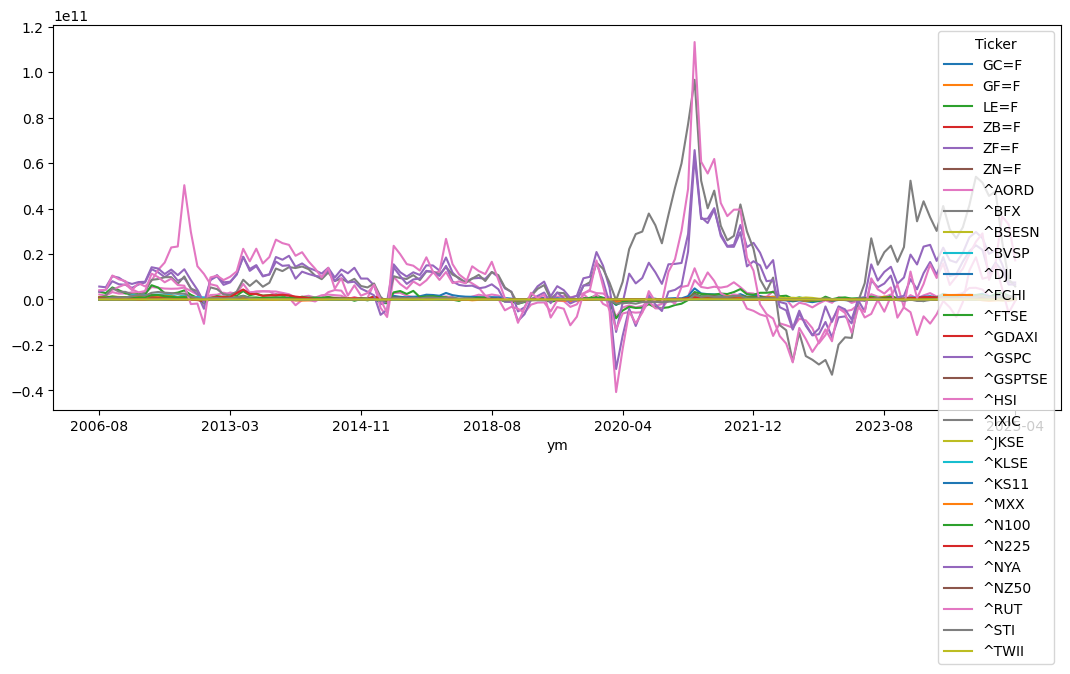

In [81]:
# get inliers
df_X = df_X[df_X.count()[df_X.count()>=out_low].index]

df_X.dropna().plot(figsize=(13,5))

In [82]:
# capture lags up to 12 months back
lst_df = [df_X]
for i in range(1,13):
    
    df_shift = df_X.shift(i)
    df_shift.columns = df_shift.columns+f'_{i}mo_lag'
    lst_df.append(df_shift)
    
df_X = pd.concat(lst_df,axis=1).dropna()

In [83]:
df_X

Ticker,GC=F,GF=F,LE=F,ZB=F,ZF=F,ZN=F,^AORD,^BFX,^BSESN,^BVSP,...,^KLSE_12mo_lag,^KS11_12mo_lag,^MXX_12mo_lag,^N100_12mo_lag,^N225_12mo_lag,^NYA_12mo_lag,^NZ50_12mo_lag,^RUT_12mo_lag,^STI_12mo_lag,^TWII_12mo_lag
ym,,,,,,,,,,,,,,,,,,,,,
2013-12,-4109.497704,5294.872472,4104.204253,-297213.984746,-2.951425e+04,-5.257012e+05,2.321941e+09,3.828952e+07,17819.681262,-8.458909e+06,...,2.589183e+08,6.705971e+05,6.790180e+08,4.402235e+08,7.875316e+08,8.581328e+09,4.665264e+07,9.715583e+09,7.594219e+08,4.061731e+06
2014-01,-48036.415556,4804.720508,50614.578673,-402777.619691,-3.280380e+05,-9.766745e+05,9.011843e+08,3.889749e+07,6373.782930,-1.495111e+07,...,2.212556e+08,3.428876e+04,9.362495e+08,5.672895e+08,1.150704e+09,1.022054e+10,3.440505e+07,1.045378e+10,7.508221e+08,2.163560e+06
2014-02,-1940.159802,11643.235423,22526.469005,-459897.235535,-3.710704e+05,-1.168379e+06,1.153094e+09,5.313029e+07,19913.638317,-1.151981e+07,...,1.071280e+08,-1.353363e+04,8.352722e+08,4.549001e+08,1.000824e+09,6.450529e+09,8.264884e+07,8.556889e+09,4.468491e+08,-7.647488e+05
2014-03,-49946.234892,8357.098880,59940.058806,-213634.107722,-4.409076e+04,-6.560379e+05,1.635577e+09,5.689383e+07,68971.323303,-7.125517e+06,...,1.705638e+08,-3.115035e+04,7.591307e+08,4.908295e+08,9.758384e+08,7.515839e+09,3.218608e+08,1.000629e+10,5.932015e+08,-8.090005e+04
2014-04,-991.440597,6810.243927,18231.520999,-566448.563606,-5.850781e+05,-1.686854e+06,8.538782e+08,4.209069e+07,23259.158374,-5.591068e+06,...,3.212228e+08,-7.003703e+04,4.013391e+08,9.637975e+08,2.831475e+09,1.099457e+10,2.089290e+08,1.232428e+10,8.362407e+08,3.015468e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12,4612.670903,24294.114650,12049.590786,-227398.899450,-1.843506e+04,-3.695359e+05,1.477608e+09,1.399961e+07,12468.658782,-2.329576e+07,...,-8.255136e+07,1.599195e+06,6.841736e+08,7.060669e+08,5.872409e+08,8.959283e+09,6.081740e+06,1.230517e+10,-2.852369e+07,2.009617e+07
2025-01,71533.111850,9953.893113,87602.408883,-640544.758621,-4.846803e+05,-1.259207e+06,1.951205e+09,2.255573e+07,22079.850309,-2.593932e+06,...,9.001705e+07,3.617366e+05,2.043086e+08,4.569707e+08,6.825493e+08,4.458578e+09,-1.302984e+06,6.515551e+08,-6.219433e+08,1.067918e+07
2025-02,17262.897396,16915.257790,8272.971206,-88807.500000,4.268753e+05,4.705527e+05,1.337252e+09,2.812305e+07,1615.050305,-1.088403e+07,...,3.264930e+08,9.532153e+05,2.079240e+08,5.643100e+08,1.039312e+09,1.158726e+10,-5.663701e+06,6.828857e+09,-6.599887e+08,9.820083e+06


In [84]:
from pca import *

In [85]:
## scale our macro variables for PCA
d_scale = scale_df(df_X,
                   scale_type = 'mm',
                   famd=False,
                   s_wt=None,
                   yj=True)

## perform PCA
d_pca = pca(d_scale['df_scaled'], 
            d_scale['pt'], d_scale['scaler'],
            d_scale['df_famd'],
            d_scale['s_wt'])
df_pca = d_pca['df_pca']

## NOW CLUSTER OUR MACRO DATA INTO EPOCHS
## find optimal parameters based on unique rows
X = df_pca.drop_duplicates()

## min max scale
s_min = X.min()
s_max = X.max()

X = (X-s_min) / (s_max-s_min)

lst_db_score = []
lst_adj_score = []
lst_tup_param = []

for min_size in [int(np.log(X.shape[0])),int(np.sqrt(X.shape[0]))]:

    ### select for epsilon values based on min pts
    # instantiate nearest neighbors model and get distances to optimize for epsilon
    neigh = NearestNeighbors(n_neighbors= min_size , metric = 'euclidean')

    neigh.fit(X)

    distances, indices = neigh.kneighbors(X)

    # isolate the unique distances of the nth nearest neighbor
    distances = np.sort(distances[:,-1])

    # look for the inflection point
    lst_eps = find_elbow(distances,cv='convex')

    for eps in lst_eps:

        for min_samp in [int(np.log(X.shape[0])),int(np.sqrt(X.shape[0]))]:

            for method in 'eom leaf'.split():
                ## fit HDBSCAN model to identify outliers
                try:
                    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size,
                                                min_samples=min_samp,
                                                cluster_selection_epsilon=eps,
                                                cluster_selection_method = method)
                    clusterer.fit(X)

                    lst_tup_param.append((min_size,min_samp,eps,method))

                    lst_db_score.append(davies_bouldin_score(X, clusterer.labels_))
                    
                except:
                    pass


params = lst_tup_param[np.argmin(lst_db_score)]

min_size = params[0]
min_samp = params[1]
eps = params[2]
method = params[3]

clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size,
                            min_samples=min_samp,
                            cluster_selection_epsilon=eps,
                            cluster_selection_method = method)
# fit clusterer regardless of duplicate rows
X = df_pca.copy()
clusterer.fit(X)

# reverse transform 
X = X*(s_max - s_min) + s_min

X['Cluster'] = clusterer.labels_

X['Cluster'] = X['Cluster']+1

idx_out = X[X['Cluster'] == 0].index

X.loc[idx_out,'Cluster'] = -1

df_yoy.loc[X.index,'Cluster'] = X['Cluster'].copy().astype('str')

In [89]:
df_yoy = df_yoy[df_yoy.columns[df_yoy.columns.isin(df_X.columns.tolist()+['Cluster'])]].loc[df_X.index].copy()

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
import seaborn as sns

In [92]:
df_un = df_yoy.drop(columns=['Cluster']).unstack().reset_index()
df_c = df_yoy['Cluster'].reset_index()

KeyError: "['Cluster'] not found in axis"

In [ ]:
df_c

In [ ]:
df_un.columns = 'Ticker ym YoY_chg'.split()

In [ ]:
df_plot = df_un.merge(df_c,on='ym')

df_plot = df_plot[~df_plot['Ticker'].str.contains('lag')].copy()

In [ ]:
df_plot['ym'] = pd.to_datetime(df_plot['ym'])

In [ ]:
df_plot

In [ ]:
df_c['max']=df_un['YoY_chg'].max()
df_c['min']=df_un['YoY_chg'].min()

In [ ]:
df_c['ym'] = pd.to_datetime(df_c['ym'])

In [ ]:
import matplotlib.dates as mdates

In [ ]:
fig,ax = plt.subplots(figsize=(13,5))

sns.lineplot(df_plot,
             x='ym',
             y='YoY_chg',
             hue='Ticker',
             palette='tab20',
             legend=False,
             ax=ax)

sns.scatterplot(df_c,
                x='ym',
                y='max',
                hue='Cluster',
                alpha=.5,
                ax=ax,
                legend=False)

sns.scatterplot(df_c,
                x='ym',
                y='min',
                hue='Cluster',
                alpha=.5,ax=ax)

# date_format = mdates.DateFormatter('%Y-%m')
# ax.xaxis.set_major_formatter(date_format)

plt.tight_layout()

In [ ]:
df_plot[df_plot['YoY_chg']>3]['Ticker'].unique()